In [1]:
import numpy as np
from pandas_datareader import data as pdr
import datetime as dt
import mplfinance as mpf
import yfinance as yf
import pandas as pd

In [2]:
start = dt.datetime(2018,1,1)
end = dt.datetime.today()
yf.pdr_override()
df = pdr.get_data_yahoo('ADANIENT.NS',start,end)
df=df[df['Volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
# df.drop('Close',axis='columns',inplace=True)
df.tail()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
1563,2993.250000,3000.199951,2850.000000,2874.649902,2874.649902,2377944
1564,2889.949951,2905.350098,2822.000000,2835.949951,2835.949951,1262311
1565,2850.000000,2890.899902,2820.000000,2860.550049,2860.550049,951411
1566,2864.800049,2883.649902,2756.000000,2766.649902,2766.649902,1485510
1567,2794.949951,2809.000000,2760.449951,2797.250000,2797.250000,2354794


In [3]:
import pandas_ta as pa

In [4]:
# Adding indicators
df['RSI']=pa.rsi(df.Close, length=15)
df['EMAF']=pa.ema(df.Close, length=20)
df['EMAM']=pa.ema(df.Close, length=100)
df['EMAS']=pa.ema(df.Close, length=150)
df["ATR"] = pa.atr(df.High, df.Low, df.Close, length=16)
df["WPR"] = pa.willr(df.High, df.Low, df.Close, length=16)
a = pa.macd(df.Close)
df = df.join(a)
df['Target'] = df['Close']-df.Open
df['Target'] = df['Target'].shift(-1)

df['TargetClass'] = [1 if df.Target[i]>0 else 0 for i in range(len(df))]

df['TargetNextClose'] = df['Adj Close'].shift(-1)

df.dropna(inplace=True)
df.reset_index(inplace = True)
df.drop(['Volume', 'Close','index','Low','High','Open'], axis=1, inplace=True)


In [5]:
df

,Adj Close,RSI,EMAF,EMAM,EMAS,ATR,WPR,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,Target,TargetClass,TargetNextClose
0,125.663071,79.310011,111.117838,94.883821,94.045502,6.352583,-11.025149,12.590602,1.320244,11.270358,-4.395103,0,120.559196
1,120.559196,69.871941,112.154641,95.420859,94.415817,6.418721,-22.880765,11.883568,0.490568,11.393000,11.292534,1,126.582405
2,126.582405,73.812361,113.673215,96.067964,94.861961,7.208606,-12.439862,11.680441,0.229953,11.450488,-2.341904,0,127.026237
3,127.026237,74.080002,115.089939,96.711150,95.308144,7.106944,-12.342924,11.424014,-0.021179,11.445193,-0.320808,0,126.265404
4,126.265404,72.715036,116.298408,97.326352,95.738220,6.895337,-16.186433,11.031502,-0.330953,11.362455,-1.026588,0,123.253807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,2993.250000,37.967803,3094.066709,3013.104789,2917.832196,77.237888,-89.472787,-35.293416,-9.834913,-25.458504,-118.600098,0,2874.649902
1414,2874.649902,30.472884,3073.169870,3010.363108,2917.260245,81.798017,-93.907589,-48.275453,-18.253559,-30.021893,-54.000000,0,2835.949951
1415,2835.949951,28.505587,3050.577497,3006.909382,2916.183288,81.895022,-96.721516,-60.983592,-24.769359,-36.214233,10.550049,1,2860.550049
1416,2860.550049,31.516725,3032.479645,3004.011177,2915.446424,81.207827,-88.745478,-68.282740,-25.654806,-42.627935,-98.150146,0,2766.649902


In [6]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

Adj Close          0
RSI                0
EMAF               0
EMAM               0
EMAS               0
ATR                0
WPR                0
MACD_12_26_9       0
MACDh_12_26_9      0
MACDs_12_26_9      0
Target             0
TargetClass        0
TargetNextClose    0
dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
# from pickle import load
# sc = load(open('scalerlstmtechindX.pkl', 'rb'))
# sc2=load(open('scalerlstmtechindy.pkl','rb'))
# sc2 = MinMaxScaler(feature_range=(0,1))
# splitlimit = int(len(df)*0.8)
# print(splitlimit)
# train_split=df[:]
sc = MinMaxScaler(feature_range=(0,1))
sc2 = MinMaxScaler(feature_range=(0,1))
test_split = df[:]
# X_train, X_test = X[:splitlimit], X[splitlimit:]
# y_train, y_test = y[:splitlimit], y[splitlimit:]
# train_split = sc.fit_transform(train_split)
test_split = sc.fit_transform(test_split)
# print(train_split)

In [8]:
test_split.shape

(1418, 13)

In [9]:
# # multiple feature from data provided to the model
# X_train = []
# #print(data_set_scaled[0].size)
# #data_set_scaled=data_set.values
# backcandles = 30
# print(train_split.shape[0])
# for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
#     X_train.append([])
#     for i in range(backcandles, train_split.shape[0]):#backcandles+2
#         X_train[j].append(train_split[i-backcandles:i, j])

# #move axis from 0 to position 2
# X_train=np.moveaxis(X_train, [0], [2])

# #Erase first elements of y because of backcandles to match X length
# #del(yi[0:backcandles])
# #X, yi = np.array(X), np.array(yi)
# # Choose -1 for last column, classification else -2...
# X_train, y_traini =np.array(X_train), np.array(train_split[backcandles:,-1])
# y_train=np.reshape(y_traini,(len(y_traini),1))
# #y=sc.fit_transform(yi)
# #X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# # X_train = sc1.fit_transform(X_train)
# print(X_train)
# print(X_train.shape)
# # y_train = sc2.fit_transform(y_train)
# print(y_train)
# print(y_train.shape)

In [10]:
# multiple feature from data provided to the model
X_test = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(test_split.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X_test.append([])
    for i in range(backcandles, test_split.shape[0]):#backcandles+2
        X_test[j].append(test_split[i-backcandles:i, j])

#move axis from 0 to position 2
X_test=np.moveaxis(X_test, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X_test, y_testi =np.array(X_test), np.array(test_split[backcandles:,-1])
y_test=np.reshape(y_testi,(len(y_testi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_test = sc1.transform(X_test)
print(X_test)
print(X_test.shape)
# y_test = sc2.transform(y_test)
print(y_test)
print(y_test.shape)

1418
[[[2.49484563e-03 8.45853074e-01 0.00000000e+00 ... 4.22991054e-03
   8.96575299e-01 7.09985227e-01]
  [1.23389966e-03 7.25622007e-01 2.67188905e-04 ... 4.45385926e-03
   7.74795432e-01 7.09071580e-01]
  [2.72197330e-03 7.75818811e-01 6.58532360e-04 ... 7.12848687e-03
   8.82043491e-01 7.08809094e-01]
  ...
  [8.56897966e-03 6.36612909e-01 8.17946182e-03 ... 1.28900072e-02
   5.44313434e-01 7.04100791e-01]
  [7.69010705e-03 5.88581097e-01 8.31671942e-03 ... 1.28137925e-02
   4.54214286e-01 7.03447694e-01]
  [7.42157018e-03 5.74083938e-01 8.41390746e-03 ... 1.20756948e-02
   4.26684267e-01 7.02711707e-01]]

 [[1.23389966e-03 7.25622007e-01 2.67188905e-04 ... 4.45385926e-03
   7.74795432e-01 7.09071580e-01]
  [2.72197330e-03 7.75818811e-01 6.58532360e-04 ... 7.12848687e-03
   8.82043491e-01 7.08809094e-01]
  [2.83162504e-03 7.79228268e-01 1.02362844e-03 ... 6.78424876e-03
   8.83039229e-01 7.08477733e-01]
  ...
  [7.69010705e-03 5.88581097e-01 8.31671942e-03 ... 1.28137925e-02
   4.

In [11]:
print(y_test.shape)
print(X_test.shape)

(1388, 1)
(1388, 30, 8)


In [12]:
# y_train=df.iloc[30:splitlimit,0].values
y_test=df.iloc[30:,0].values
# y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
# y_train = sc2.fit_transform(y_train)
y_test = sc2.fit_transform(y_test)

In [13]:
from tensorflow.keras.models import load_model
model = load_model('LSTMtechnicalind32_75_r.keras')

In [14]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
[0.01339714] [0.00524881]
[0.0094015] [0.00428448]
[0.0080605] [0.00522439]
[0.00812041] [0.00477275]
[0.00635346] [0.0061765]
[0.00737158] [0.00333238]
[0.0038865] [0.00498026]
[0.00471344] [0.00435773]
[0.00317136] [0.00390609]
[0.00092524] [0.00323473]


In [15]:
y_pred.shape


(1388, 1)

In [16]:
import matplotlib.pyplot as plt

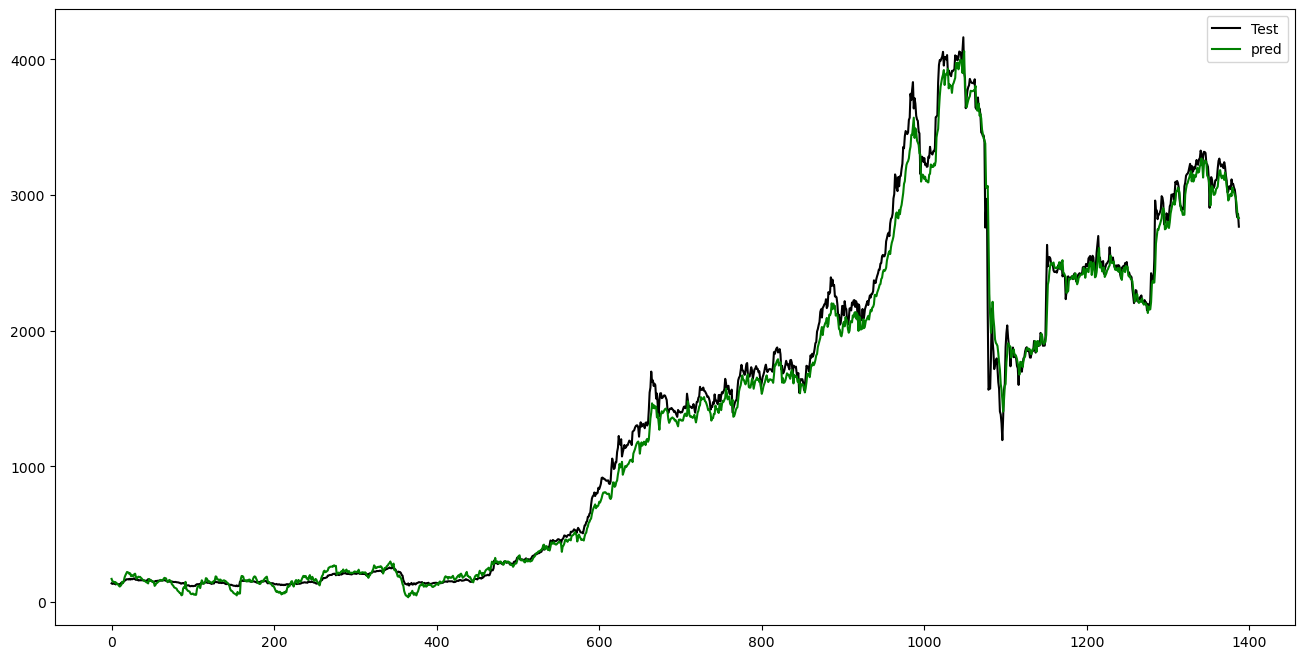

In [17]:
plt.figure(figsize=(16,8))
plt.plot(sc2.inverse_transform(y_test), color = 'black', label = 'Test')
plt.plot(sc2.inverse_transform(y_pred), color = 'green', label = 'pred')
plt.legend()
plt.show()

In [18]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,y_pred))

0.0258203277251257